In [1]:
import sys
import numpy as np
import pandas as pd

%matplotlib inline

import matplotlib
import seaborn as sns
from matplotlib import pyplot as plt

# plt.style.use('whitegrid')
sns.set_style('whitegrid')

matplotlib.rcParams.update({'figure.figsize': (10, 6)})
matplotlib.rcParams.update({'font.size': 16})
matplotlib.rcParams.update({'axes.labelsize': 20})
matplotlib.rcParams.update({'xtick.labelsize': 12})
matplotlib.rcParams.update({'ytick.labelsize': 12})
matplotlib.rcParams.update({'font.family': 'Helvetica, Arial, sans-serif'})

%config InlineBackend.figure_format = 'retina'

In [4]:
# https://www.kaggle.com/shivam2503/diamonds/data
diamonds = pd.read_csv('data/diamonds.csv')

from copy import deepcopy
'''
data = deepcopy(diamonds[['carat', 'x', 'y', 'z', 'depth', 'table',
             'clarity', 'color']])
'''
data = deepcopy(diamonds[['carat', 'x', 'y', 'z', 'depth', 'table', 'price',
                          'clarity', 'color']])
target = deepcopy(diamonds['cut']).astype('category')

for col in ['carat','x','y','z','depth','table','price']:
    data[col] = (data[col] - data[col].mean()) / data[col].std()


for col in ['color', 'clarity']:
    data[col] = data[col].astype('category');

data.describe()

,carat,x,y,z,depth,table,price
count,5.394000e+04,5.394000e+04,5.394000e+04,5.394000e+04,5.394000e+04,5.394000e+04,5.394000e+04
mean,2.149807e-16,2.508108e-16,-2.107654e-17,-2.023348e-16,-4.002434e-15,1.175017e-16,-1.095980e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.261446e+00,-5.109073e+00,-5.020884e+00,-5.014510e+00,-1.308748e+01,-6.470013e+00,-9.040868e-01
25%,-8.395154e-01,-9.103164e-01,-8.882717e-01,-8.909378e-01,-5.231005e-01,-6.521325e-01,-7.476738e-01
50%,-2.066190e-01,-2.777527e-02,-2.147379e-02,-1.237607e-02,3.531645e-02,-2.046032e-01,-3.839636e-01
75%,5.106635e-01,7.210475e-01,7.052356e-01,7.103118e-01,5.239313e-01,6.904554e-01,3.487834e-01
max,8.885992e+00,4.465161e+00,4.654922e+01,4.004720e+01,1.204128e+01,1.680151e+01,3.732404e+00


In [5]:
from sklearn.model_selection import train_test_split
data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.2)

from sklearn.preprocessing import LabelEncoder

##### KERAS #####
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Activation, Input
from keras.layers import Embedding, Flatten, Merge, concatenate
from keras.models import Model

Using TensorFlow backend.


In [27]:
numeric_headers = ['carat', 'x', 'y', 'z', 'depth', 'table']

X_train_num =  data_train[numeric_headers].values
X_test_num = data_test[numeric_headers].values

print(X_train_num)
print(X_train_num.shape[1])

encoders = dict() 
categorical_headers = ['color','clarity']

for col in categorical_headers:
    data_train[col] = data_train[col].str.strip()
    data_test[col] = data_test[col].str.strip()
    encoders[col] = LabelEncoder()
    data_train[col+'_int'] = encoders[col].fit_transform(data_train[col])
    data_test[col+'_int'] = encoders[col].transform(data_test[col])
    
categorical_headers_ints = [x+'_int' for x in categorical_headers]

[[ 0.85476586  0.81030203  0.88035601  0.38432704  0.69045541]
 [ 0.72104751  0.76652436  0.55443795 -1.36072587  1.58551401]
 [-0.42893033 -0.41547286 -0.45165694 -0.38349624 -0.6521325 ]
 ..., 
 [ 0.9082532   0.93287952  1.02205952  0.80313973 -0.20460319]
 [ 0.15051586  0.1011037   0.21434954  0.73333762 -0.20460319]
 [ 0.40903801  0.46883617  0.52609725  0.73333762 -0.6521325 ]]
5


/Users/jake.rowland/.local/share/virtualenvs/Project6-PRT88SwD/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/Users/jake.rowland/.local/share/virtualenvs/Project6-PRT88SwD/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/jake.rowland/.local/share/virtualenvs/Project6-PRT88SwD/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [28]:
# Comment key
# #   = My comments
# ##  = Larson comments
# ### = Changed code


# Columns to generate 1-hots
#  education    X occupation
#  country      X occupation
#  relationship X marital_status X sex
#  race         X sex
cross_columns = [['clarity', 'color']]


# Define the order and layers of the network????
## we need to create separate sequential models for each embedding
embed_branches = []
X_ints_train = []
X_ints_test = []
all_inputs = []
all_branch_outputs = []


# For all sets of columns to be crossed
for cols in cross_columns:
    # Creates labels for categorical data. And stores the map
    #  enc.transform translates categorical data to integer
    ## encode crossed columns as ints for the embedding
    enc = LabelEncoder()
    
    ## create crossed labels
    # Create dataframe of the columns cross product as string data
    X_crossed_train = data_train[cols].apply(lambda x: '_'.join(x), axis=1)
    X_crossed_test = data_test[cols].apply(lambda x: '_'.join(x), axis=1)
    
    # fits the label encoder to the [x_crossed_train, x_crossed_test]
    enc.fit(np.hstack((X_crossed_train.values,  X_crossed_test.values)))
    # transform the string to integer for train data
    X_crossed_train = enc.transform(X_crossed_train)
    # transform the string to integer for test data
    X_crossed_test = enc.transform(X_crossed_test)
    
    # Add elements of x_crossed_train to list of previous x_crossed_train values
    X_ints_train.append( X_crossed_train )
    # Same with test data
    X_ints_test.append( X_crossed_test )
    
    ## get the number of categories
    N = max(X_ints_train[-1]+1) ## same as the max(df_train[col])
    ## create embedding branch from the number of categories
    # Create inputs for each of the crossed columns
    inputs = Input(shape=(1,),dtype='int32', name = '_'.join(cols))
    # Adds the Inputs to a list
    all_inputs.append(inputs)
    # Creates an Embedding with input number of categories and output the sqrt(#categories). 
    #  input_length is max matrix size of input
    # Passes inputs into embedding

    x = Embedding(input_dim=N, output_dim=int(np.sqrt(N)), input_length=1)(inputs)
    
    # Flatten the dimension of the Embedding
    x = Flatten()(x)
    # Add the Flattened Embedding to the list
    all_branch_outputs.append(x)

# Merge all of the Flattened branches to create a wide_branch
## merge the branches together
### wide_branch = concatenate(all_branch_outputs)
wide_branch = all_branch_outputs[0]

## reset this input branch
all_branch_outputs = []
## add in the embeddings
for col in categorical_headers_ints:
    ## encode as ints for the embedding
    X_ints_train.append( data_train[col].values ) # append NDarrays to list
    X_ints_test.append( data_test[col].values )
    
    ## get the number of categories
    N = max(X_ints_train[-1]+1) ## same as the max(df_train[col])
    # Input defines the tensor shape
    ## create embedding branch from the number of categories
    inputs = Input(shape=(1,),dtype='int32', name=col)
    # Create a list of all the Inputs
    all_inputs.append(inputs)
    
    x = Embedding(input_dim=N, output_dim=int(np.sqrt(N)), input_length=1)(inputs)
    
    x = Flatten()(x)
    all_branch_outputs.append(x)
    
## also get a dense branch of the numeric features
all_inputs.append(Input(shape=(X_train_num.shape[1],),sparse=False, name='numeric_data'))
# Create 20 node dense NN with relu activation
print("input layers", all_inputs[-1])
'''
x = Dense(units=5, activation='relu')(all_inputs[-1])
'''
x = Dense(units=5, activation='relu')(all_inputs[-1])
all_branch_outputs.append( x )

## merge the branches together
deep_branch = concatenate(all_branch_outputs)
'''
deep_branch = Dense(units=50,activation='relu')(deep_branch)
deep_branch = Dense(units=10,activation='relu')(deep_branch)
'''
deep_branch = Dense(units=50,activation='relu')(deep_branch)
deep_branch = Dense(units=10,activation='relu')(deep_branch)
    
final_branch = concatenate([wide_branch, deep_branch])
final_branch = Dense(units=5,activation='sigmoid')(final_branch)

model = Model(inputs=all_inputs, outputs=final_branch)

'''model.compile(optimizer='Nadam',
              loss='categorical_crossentropy',
              metrics=['categorical_accuracy', 'accuracy'])
              
    SGD = 41%
    RMSprop(lr=0.001) = 57%
    Adagrad = 55%
    Adadelta = 55%
    Nadam(epochs=20) = 70%
'''
# Best is categorical_crossentropy and mean_squared_error
model.compile(optimizer='Nadam',
              loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])


print(target_train.head())

print(X_ints_train)
print(X_train_num
     )

target_train_one_hot = pd.get_dummies(target_train)
model.fit(X_ints_train+ [X_train_num],
        np.asarray(target_train_one_hot), epochs=5, batch_size=30, verbose=1)

input layers Tensor("numeric_data_8:0", shape=(?, 5), dtype=float32)
13873      Premium
16986    Very Good
44548        Ideal
49166         Good
45610        Ideal
Name: cut, dtype: category
Categories (5, object): [Fair, Good, Ideal, Premium, Very Good]
[array([17, 35, 38, ..., 39, 21, 18]), array([3, 0, 3, ..., 4, 0, 4]), array([2, 5, 5, ..., 5, 3, 2])]
[[ 0.85476586  0.81030203  0.88035601  0.38432704  0.69045541]
 [ 0.72104751  0.76652436  0.55443795 -1.36072587  1.58551401]
 [-0.42893033 -0.41547286 -0.45165694 -0.38349624 -0.6521325 ]
 ..., 
 [ 0.9082532   0.93287952  1.02205952  0.80313973 -0.20460319]
 [ 0.15051586  0.1011037   0.21434954  0.73333762 -0.20460319]
 [ 0.40903801  0.46883617  0.52609725  0.73333762 -0.6521325 ]]
Epoch 1/5
43152/43152 [==============================] - 6s - loss: 0.8645 - categorical_accuracy: 0.6668     
Epoch 2/5
43152/43152 [==============================] - 5s - loss: 0.7683 - categorical_accuracy: 0.6979     
Epoch 3/5
43152/43152 [===========

In [19]:
y_hat = model.predict(X_ints_test+[X_test_num])

[[ 304   14    6   14    3]
 [  81  525   19   64  268]
 [   5    4 3864  199  240]
 [   0    1  293 2272  194]
 [   7  225  507  487 1192]]


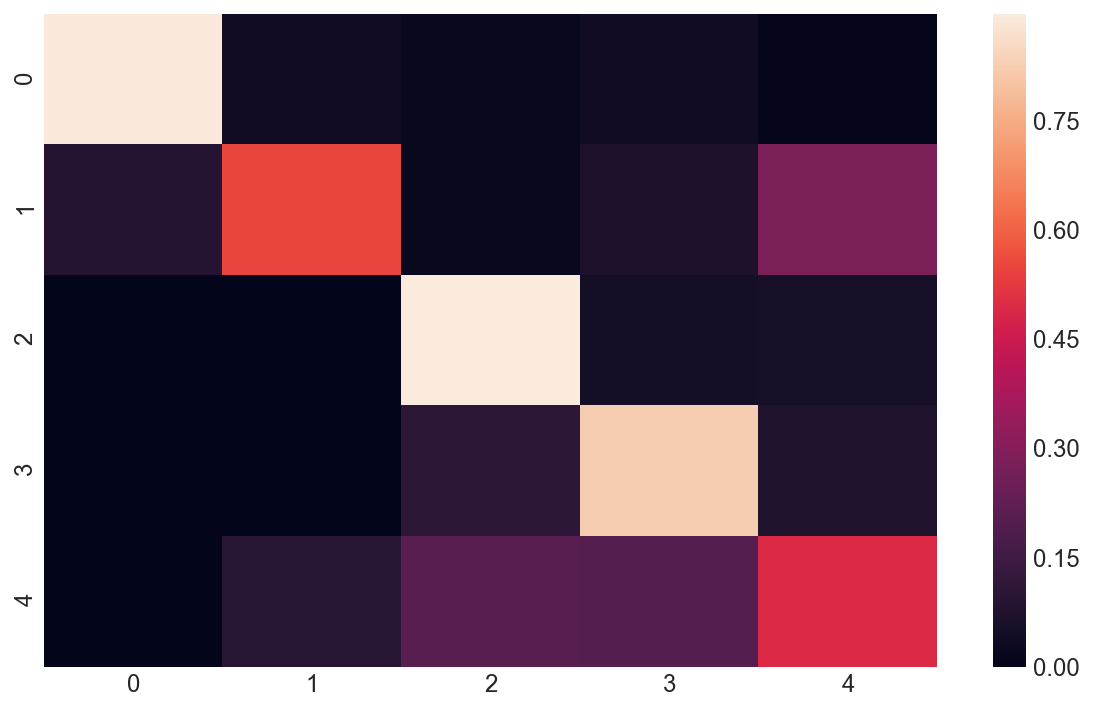

In [20]:
from sklearn.metrics import confusion_matrix
target_test_one_hot = pd.get_dummies(target_test)
cnf = confusion_matrix(
    np.asarray(target_test_one_hot).argmax(1),
    y_hat.argmax(1)
)
print(cnf)
cnf_norm = cnf.astype('float') / cnf.sum(axis=1)[:, np.newaxis]
sns.heatmap(cnf_norm)

In [112]:
from functools import reduce

class WideDeepNetwork():
    def __init__(
        self, epochs=5, batch_size=35, activation='relu', final_activation='sigmoid', optimizer='adagrad', 
        loss='mean_squared_error', metrics=['accuracy'], deep_input_size=5, 
        deep_layer_sizes=[50,10], numeric_features=None, categorical_features=None,
        cross_categories=None,
    ):
        self.epochs = epochs
        self.batch_size = batch_size
        
        self.activation = activation
        self.final_activation = final_activation
        self.optimizer = optimizer
        self.loss = loss
        self.metrics = metrics
        
        self.deep_input_size = deep_input_size
        self.deep_layer_sizes = deep_layer_sizes
        self.numeric_features = numeric_features
        self.categorical_features = categorical_features
        self.cross_categories = cross_categories
        
    def _make_wide_network(self):
        ## we need to create separate sequential models for each embedding
        embed_branches = []
        X_ints_train = []
        all_inputs = []
        all_branch_outputs = []
        
        if not all(isinstance(element, list) for element in self.cross_categories):
            raise ValueError('cross_categories should be type [[]]')

        # For all sets of columns to be crossed
        for cols in self.cross_categories:
            # Gets number of 1-hot encoded crossed classes given categories and values
            N = 1
            for col in cols:
                N *= len(self.categorical_features[col])

            ## create embedding branch from the number of categories
            # Create inputs for each of the crossed columns
            inputs = Input(shape=(1,),dtype='int32', name = '_'.join(cols))
            # Adds the Inputs to a list
            all_inputs.append(inputs)
            # Creates an Embedding with input number of categories and output the sqrt(#categories). 
            #  input_length is max matrix size of input
            # Passes inputs into embedding
            x = Embedding(input_dim=N, output_dim=int(np.sqrt(N)), input_length=1)(inputs)
            # Flatten the dimension of the Embedding
            x = Flatten()(x)
            # Add the Flattened Embedding to the list
            all_branch_outputs.append(x)

        # Merge all of the Flattened branches to create a wide_branch
        ## merge the branches together
        ### wide_branch = concatenate(all_branch_outputs)
        if(len(all_branch_outputs) == 1):
            wide_branch = all_branch_outputs[0]
        else:
            wide_branch = concatinate(all_branch_outputs)
        return all_inputs, wide_branch
    
    def _make_deep_network(self):
        
        if not all(isinstance(element, list) for _, element in self.categorical_features.items()):
            raise ValueError('Categorical features must be a dictonary of lists')
        
        all_inputs = []  
        all_branch_outputs = []
        ## add in the embeddings
        for key, l in self.categorical_features.items():
            # Get highest int classification of category feature
            N = len(l)-1

            # Input defines the tensor shape
            ## create embedding branch from the number of categories
            inputs = Input(shape=(1,),dtype='int32', name=key)
            # Create a list of all the Inputs
            all_inputs.append(inputs)

            x = Embedding(input_dim=N, output_dim=int(np.sqrt(N)), input_length=1)(inputs)

            x = Flatten()(x)
            all_branch_outputs.append(x)

        ## also get a dense branch of the numeric features
        if len(self.numeric_features) < 1:
            raise ValueError('Numeric Features must not be empty')
            
        all_inputs.append(Input(shape=(len(self.numeric_features),),sparse=False, name='numeric_data'))

        # Gets a dense encoding of all the numerical data
        x = Dense(units=self.deep_input_size, activation=self.activation)(all_inputs[-1])
        all_branch_outputs.append( x )

        # merge the branches together
        deep_branch = concatenate(all_branch_outputs)
        
        for units in self.deep_layer_sizes:
            deep_branch = Dense(units=units,activation=self.activation)(deep_branch)
            
        return all_inputs, deep_branch
        
    def make_model(self):
        wide_input, wide_branch = self._make_wide_network()
        deep_input, deep_branch = self._make_deep_network()
        all_inputs = wide_input + deep_input
        
        final_branch = concatenate([wide_branch, deep_branch])
        final_branch = Dense(units=5,activation=self.final_activation)(final_branch)
        
        self.model = Model(inputs=all_inputs, outputs=final_branch)
        
        self.model.compile(optimizer='Nadam',
                           loss='categorical_crossentropy',
                           metrics=['categorical_accuracy'])
        
    
    def fit(self, X, y, print_progress=False):
        X_train = []
        # Get crossed categorical values
        for cols in self.cross_categories:
            X_train.append(X[cols].apply(lambda x: '_'.join(x), axis=1))
        for col in list(self.categorical_features.keys()):
            X_train.append(X_catagorical[col].cat.codes)    
        X_numerical = X[self.numeric_features]
        
        X_train = np.hstack((np.asarray(X_catagorical), np.asarray(X_numerical)))
        y_one_hot = np.asarray(pd.get_dummies(target_train))
        self.model.fit(X_train, y_one_hot, 
                       epochs=self.epochs, batch_size=self.batch_size, 
                       verbose=print_progress)
    
    def predict(self, X):
        y_hat = predict(X)
        return y_hat
        
    # [CITE] http://algoadventures.com/sklearn-from-the-source-code-up-basics/
    # ClassifierMixin implementation
    def score(self, X, y, sample_weight=None):
        from sklearn.metrics import accuracy_score
        return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
    # end implementation

In [113]:
numeric_featues = numeric_headers

print(numeric_featues)
cross_categories = [['clarity','color']]
categorical_features = {'clarity': data['clarity'].value_counts().keys().tolist(), 
                        'color': data['color'].value_counts().keys().tolist()}


wdNet = WideDeepNetwork(numeric_features=numeric_featues, 
                        categorical_features=categorical_features, 
                        cross_categories=cross_categories)

wdNet.make_model()
wdNet.fit(data, target, print_progress=1)

['x', 'y', 'z', 'depth', 'table']


ValueError: The model expects 4 input arrays, but only received one array. Found: array with shape (53940, 7)

In [30]:
from sklearn.metrics import roc_auc_score


# gets the column of the maximum for each row
# then converts it to binary (manual one-hot encoding)
y_hat_one_hot = np.zeros(y_hat.shape)
y_hat_one_hot[np.arange(y_hat.shape[0]), y_hat.argmax(1)] = 1

# ROC Area under Curve score
roc_auc_score(
    np.asarray(y_test),
    y_hat_one_hot
)


NameError: name 'y_test' is not defined

In [38]:
data['clarity'].value_counts().keys().tolist()

['SI1', 'VS2', 'SI2', 'VS1', 'VVS2', 'VVS1', 'IF', 'I1']